In [1]:
"""
Imports 
"""
from WEC_GRID import WecGrid
import numpy as np
import pandas as pd


In [2]:
wec_grid = WecGrid(case="../WEC_GRID/models/grid_models/IEEE_24_bus.RAW")

# Initialize solvers
wec_grid.initialize_psse("fnsl")

    Sets PSSE environment to latest minor version among installed versions of PSSE 35.
    Use psse35.set_minor(n) to set PSSE35 minor version (n) to use.
        Example, for PSSE 35.0.x, use this as: psse35.set_minor(0)

 PSS(R)E Xplore Version 35
 Copyright (c) 1976-2025
 Siemens Industry, Inc.,
 Power Technologies International                            (PTI)
 This program is a confidential  unpublished  work  created  and  first
 licensed in 1976.  It is a trade secret which is the property of  PTI.
 All use,  disclosure,  and/or reproduction not specifically authorized
 by  PTI  is prohibited.   This  program is protected  under  copyright
 laws  of  non-U.S.  countries  and  by  application  of  international
 treaties.  All  Rights  Reserved  Under  The  Copyright  Laws.

 Could not find entry point runpy_add_to_sys_path

           SIEMENS POWER TECHNOLOGIES INTERNATIONAL

    50 BUS POWER SYSTEM SIMULATOR--PSS(R)E Xplore-35.5.2

             INITIATED ON MON, JAN 20 2025  11

In [3]:
# create WEC / CECs
wec_grid.create_wec(ID=11, model="RM3", bus_location=7)
#.create_cec(ID=6, model="cec", bus_location=2)


In [4]:
wec_grid.psseObj.dataframe

,BUS_ID,Bus,BASE,PU,ANGLE,Type,P Gen,Q Gen,P Load,Q Load,P,Q,ΔP,ΔQ,M_Angle,M_Mag
0,1,BUS 1,138.0,1.000000,0.000000,3,35.930069,180.488586,NaN,NaN,35.930069,180.488586,0.000000,-1.192093e-05,1.192093e-05,-1.570796
1,2,BUS 2,138.0,0.997822,0.000181,2,67.000000,0.000000,97.0,20.000000,-30.000000,-20.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
2,3,BUS 3,138.0,0.863703,0.187725,1,NaN,NaN,90.0,19.000000,-90.000000,-19.000000,-0.000012,0.000000e+00,1.192093e-05,3.141593
3,4,BUS 4,138.0,0.887014,-0.007247,1,NaN,NaN,74.0,15.000001,-74.000000,-15.000001,0.000003,-5.960464e-06,6.664002e-06,-1.107149
4,5,BUS 5,138.0,0.927217,-0.004004,1,NaN,NaN,71.0,14.000000,-71.000000,-14.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
5,6,BUS 6,138.0,0.907952,0.006838,1,NaN,NaN,68.0,14.000000,-68.000000,-14.000000,-0.000002,-5.960464e-06,6.365779e-06,-1.929567
6,7,BUS 7,138.0,0.796234,-0.010124,4,64.000000,0.000000,62.0,13.000000,2.000000,-13.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
7,8,BUS 8,230.0,0.805368,-0.015157,1,NaN,NaN,85.0,18.000000,-85.000000,-18.000000,-0.000001,-7.450581e-07,1.343173e-06,-2.553590
8,9,BUS 9,138.0,0.834940,0.087076,1,NaN,NaN,175.0,36.000000,-175.000000,-36.000000,-0.000006,2.235174e-06,6.365779e-06,2.782822
9,10,BUS 10,138.0,0.881702,0.064990,1,NaN,NaN,100.0,23.000000,-100.000000,-23.000000,0.000003,0.000000e+00,2.980232e-06,0.000000


In [5]:
wec_grid.psseObj.viz()

In [6]:
time = wec_grid.wecObj_list[0].dataframe.time.to_list()[-1]

wec_grid.psseObj.ac_injection(start=0, end=(time))


 Power flow data changed for machine "1" at bus 7 [7           138.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    64.0000         0.00000      PG

 Power flow data changed for bus 7 [7           138.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.796234         1.00000      VM

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         1.4704(      7     )    3.0854(      7     )
                                                             0.10738(      7     )   0.15750(      7     )
   1         0.0955(      7     )    0.3499(      8     )
                                                             0.16995(      7     )   0.04866(     21     )
   2         0.0526(      7     )    0.0504(      8     )
                                                             0.06596(      7     )   0.03005(      7     )
   3         0.0110(      7     )    0.0046(      8     )
                                                       

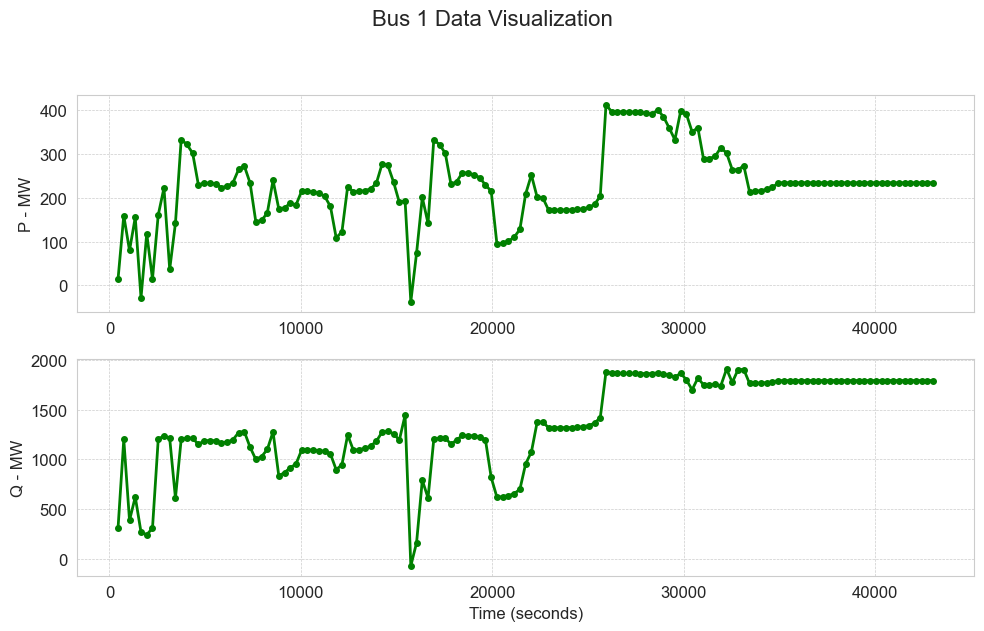

In [7]:
wec_grid.psseObj.plot_bus(bus_num=1, time=[1, time])

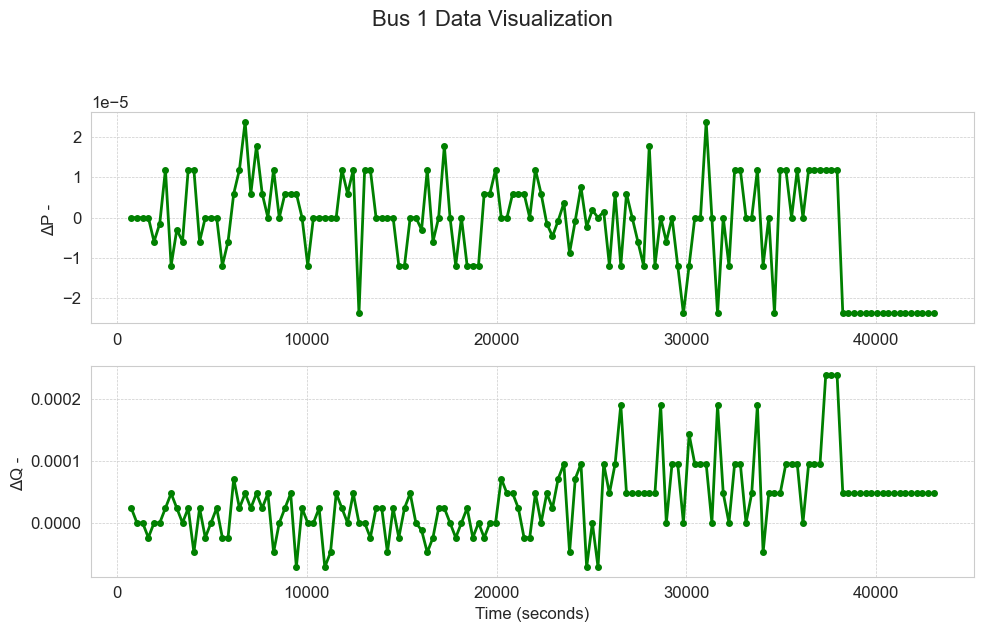

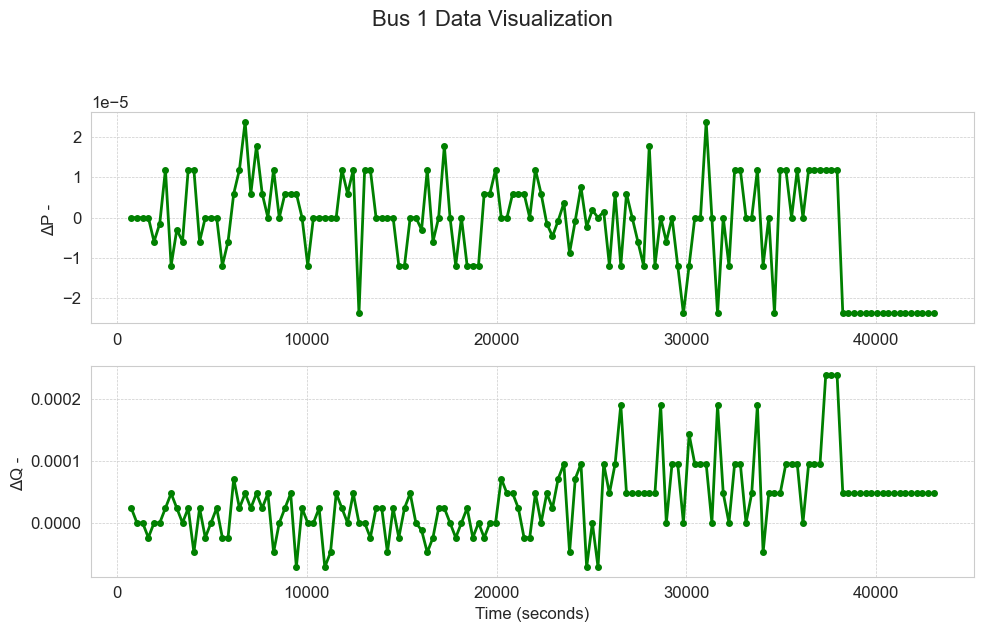

In [8]:
for bus in [2, 7]:
    #wec_grid._psse_plot_bus(bus_num=bus, time=[750, time], arg_1="ΔP", arg_2="ΔQ")
    wec_grid.psseObj.plot_bus(bus_num=1, time=[750, time], arg_1="ΔP", arg_2="ΔQ")

In [ ]:
WecObj = wg.Wec_grid(
    "../WEC_GRID/models/grid_models/IEEE_24_bus.RAW"
)  # initialize Object with Grid file (figure 1)

WecObj.initalize_psse("fnsl")  # initalize PSSe with solver


 Reading IC, SBASE, REV, XFRRAT, NXFRAT, BASFRQ...

 Converting RAW data from PSS(R)E 33 to PSS(R)E 34 format
 Starting processing of Case identification data records
 Finished processing of 3 records for Case identification data
 Starting processing of Bus data records
 Finished processing of 24 records for Bus data
 Starting processing of Load data records
 Finished processing of 16 records for Load data
 Starting processing of Fixed shunt data records
 Finished processing of 0 records for Fixed shunt data
 Starting processing of Generator data records
 Finished processing of 11 records for Generator data
 Starting processing of Branch data records
 Finished processing of 32 records for Branch data
 Finished processing of 0 records for System switching device data
 Starting processing of Transformer data records
 Finished processing of 24 records for 6 Transformer data
 Starting processing of Area data records
 Finished processing of 1 records for Area data
 Starting processing of T

In [7]:
# create WEC / CECs
WecObj.create_wec(ID=11, model="RM3", bus_location=7)
WecObj.create_cec(ID=6, model="cec", bus_location=2)



In [8]:
WecObj.psse.dataframe  # lets take a look at the data

,BUS_ID,Bus,BASE,PU,ANGLE,Type,P Gen,Q Gen,P Load,Q Load,P,Q,ΔP,ΔQ,M_Angle,M_Mag
0,1,BUS 1,138.0,1.000000,0.000000,3,35.930069,180.488586,NaN,NaN,35.930069,180.488586,0.000000,-1.192093e-05,1.192093e-05,-1.570796
1,2,BUS 2,138.0,0.997822,0.000181,4,67.000000,0.000000,97.0,20.000000,-30.000000,-20.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
2,3,BUS 3,138.0,0.863703,0.187725,1,NaN,NaN,90.0,19.000000,-90.000000,-19.000000,-0.000012,0.000000e+00,1.192093e-05,3.141593
3,4,BUS 4,138.0,0.887014,-0.007247,1,NaN,NaN,74.0,15.000001,-74.000000,-15.000001,0.000003,-5.960464e-06,6.664002e-06,-1.107149
4,5,BUS 5,138.0,0.927217,-0.004004,1,NaN,NaN,71.0,14.000000,-71.000000,-14.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
5,6,BUS 6,138.0,0.907952,0.006838,1,NaN,NaN,68.0,14.000000,-68.000000,-14.000000,-0.000002,-5.960464e-06,6.365779e-06,-1.929567
6,7,BUS 7,138.0,0.796234,-0.010124,4,64.000000,0.000000,62.0,13.000000,2.000000,-13.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
7,8,BUS 8,230.0,0.805368,-0.015157,1,NaN,NaN,85.0,18.000000,-85.000000,-18.000000,-0.000001,-7.450581e-07,1.343173e-06,-2.553590
8,9,BUS 9,138.0,0.834940,0.087076,1,NaN,NaN,175.0,36.000000,-175.000000,-36.000000,-0.000006,2.235174e-06,6.365779e-06,2.782822
9,10,BUS 10,138.0,0.881702,0.064990,1,NaN,NaN,100.0,23.000000,-100.000000,-23.000000,0.000003,0.000000e+00,2.980232e-06,0.000000


In [9]:
WecObj._psse_viz()

In [11]:
time = WecObj.wec_list[0].dataframe.time.to_list()[-1]

WecObj.psse.ac_injection(start=0, end=(time))
#WecObj.p_psse_ac_injection(start=0, end=(time))

IndexError: list index out of range